## Libraries

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

## Making list of all csv files 

In [2]:
path = "Datasets"
all_filenames = os.listdir(path)
all_filenames

['April_2019.csv',
 'August_2019.csv',
 'combined_data.csv',
 'December_2019.csv',
 'February_2019.csv',
 'January_2019.csv',
 'July_2019.csv',
 'June_2019.csv',
 'March_2019.csv',
 'May_2019.csv',
 'November_2019.csv',
 'October_2019.csv',
 'September_2019.csv']

## Merging 12 months data into single csv file

In [3]:
os.chdir('..\eCommerce-Sales-Analysis\Datasets')
os.getcwd()

'E:\\eCommerce-Sales-Analysis\\Datasets'

In [4]:
# Initialising empty data frame to store 12 months data
all_data = pd.DataFrame()

for f in all_filenames:
    df = pd.read_csv(f) 
   
    all_data = pd.concat([all_data,df])
    # pd.concat([ 1. df: where to concatenate into, 2. df which you want to add in first data frame ])

# changing a data frame to csv file using .to_csv
all_data.to_csv( "combined_data.csv", index=False)
# dataframe_name.to_csv('csv_file_name')

print("Size of merged data frame: ",all_data.shape)

all_data.shape

Size of merged data frame:  (1307943, 6)


(1307943, 6)

# Cleaning or data

## Columns with missing values

In [5]:
missing_values = all_data.isna().any()
missing_values

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

## Rows with missing values

In [6]:
missing_val_2 = all_data[all_data.isnull().any(axis=1)]
missing_val_2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


## Number of rows with mising values 

In [7]:
rows,columns = missing_val_2.shape
rows

3808

## Deleting only those rows which are totally NAN 

In [8]:
all_data.dropna(axis=0,how='all',inplace=True)

## Checking NAN values  

In [9]:
check_nan = all_data.isnull().any()
check_nan

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

# Converting Order Date(string datatype) to DateTime format
## It gives parser error when we are trying to convert month column to DateTime format

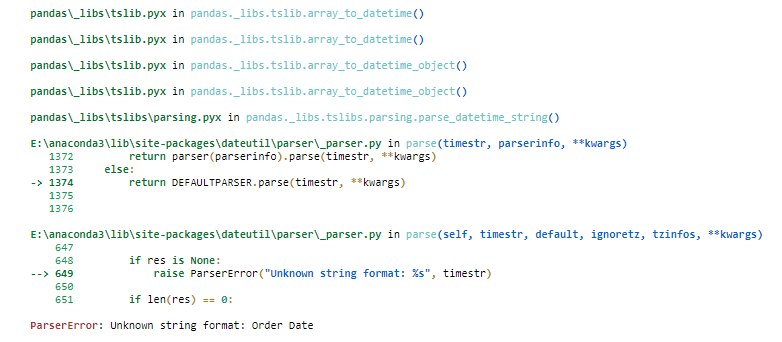

In [10]:
new = os.path.dirname(os.getcwd())
os.chdir(new)

from IPython.display import Image
Image(filename =r'Images\error1.png')

## There is still some problematic rows, we have to clean them. 

In [11]:
all_data['month'] = all_data['Order Date'].str[0:2]
all_data['month'].sample(20)

9027       02
1084052    11
1034495    06
751267     05
901        07
112828     08
1090279    10
8775       08
424530     03
937779     10
829610     12
675869     12
853477     01
445608     11
1099626    10
903513     05
579094     03
211607     02
173921     08
14659      10
Name: month, dtype: object

## There is presence of string 'Or' in month column, we have to clean it 
## That's why we are facing errors while converting data type

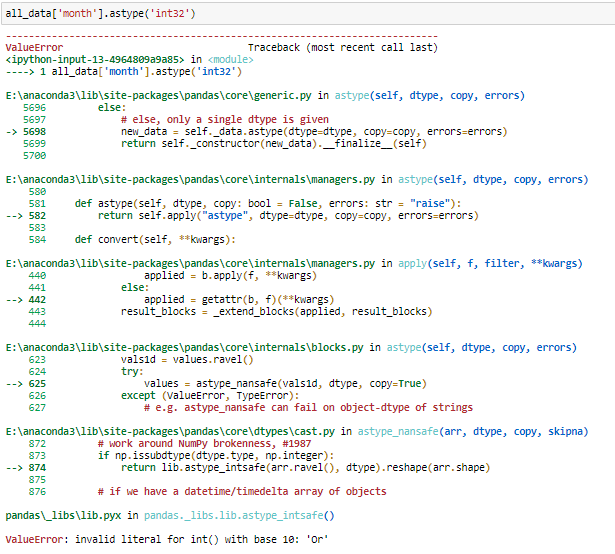

In [12]:
from IPython.display import Image
Image(filename =r'Images\error2.png')

# Cleaning Data - 2
## Removing 'Or' from month column

In [13]:
# Only putting those rows which doesn't contain 'Or' in month section
all_data = all_data[~all_data['month'].str.contains("Or")]
# Putting ~ works as an invert

# Another way: all_data = all_data[all_data['Month'].str[0:] != "Or"]

In [14]:
all_data['month'].str.contains("Or").any()

False

## Converting datatype of columns

In [15]:
all_data['month'] = all_data['month'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Order ID'] = all_data['Order ID'].astype('int32')

# What was the best month for sales?

## Calculating total sales  

In [16]:
# Making a total_sales column
all_data['total_sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
val = all_data.groupby(['month']).agg({'total_sales':'sum'})
val.round(2)

,total_sales
month,
1,12755797.11
2,15414156.94
3,19649702.66
4,23734691.68
5,22068247.25
6,18044615.82
7,18534430.32
8,15711275.16
9,14682920.91


In [17]:
all_data.sample(7)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sales
462176,294684,AA Batteries (4-pack),1,3.84,11/04/19 22:21,"759 1st St, Los Angeles, CA 90001",11,3.84
253517,219366,ThinkPad Laptop,1,999.99,06/20/19 09:04,"830 Washington St, Austin, TX 73301",6,999.99
405757,215325,Lightning Charging Cable,1,14.95,06/30/19 14:48,"475 Forest St, Seattle, WA 98101",6,14.95
845916,141800,27in FHD Monitor,1,149.99,01/26/19 12:11,"775 West St, Seattle, WA 98101",1,149.99
233442,226933,Lightning Charging Cable,1,14.95,07/31/19 14:19,"40 Lakeview St, San Francisco, CA 94016",7,14.95
651434,259083,Bose SoundSport Headphones,1,99.99,09/08/19 11:36,"474 Lincoln St, Los Angeles, CA 90001",9,99.99
210143,153046,AAA Batteries (4-pack),1,2.99,02/26/19 11:49,"345 Hickory St, Los Angeles, CA 90001",2,2.99


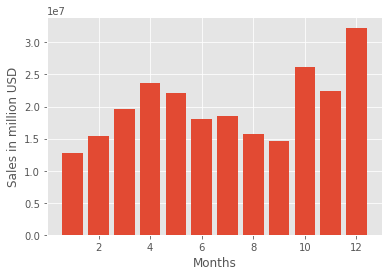

In [18]:
months = [month for month,data in all_data.groupby(['month'])]
# Method2: months = range(1,13)
plt.style.use('ggplot')
plt.bar(months,val['total_sales'])
plt.xlabel('Months')
plt.ylabel('Sales in million USD')
plt.show()

### December has highest sales of about 4.6 million USD

# What city sold the most product ?


In [19]:
all_data['city'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [20]:
all_data['city'].values

array([' Dallas', ' Boston', ' Los Angeles', ..., ' San Francisco',
       ' San Francisco', ' San Francisco'], dtype=object)

In [21]:
(all_data.values == 'Los Angeles').any()

False

## There are some whitespace character in 'city' column 

In [22]:
(all_data.values == ' Los Angeles').any()

True

## Removing whitespace character in 'city' column

In [23]:
all_data['city'] = all_data['city'].apply(lambda y: y.strip())

In [24]:
all_data['city'].values

array(['Dallas', 'Boston', 'Los Angeles', ..., 'San Francisco',
       'San Francisco', 'San Francisco'], dtype=object)

## Many states have same city names, so we have to report cities with their state name

In [25]:
def finding_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['city'] = all_data['city'] + all_data['Purchase Address'].apply(lambda x:'(' + finding_state(x) + ')')
all_data['city'].values

array(['Dallas(TX)', 'Boston(MA)', 'Los Angeles(CA)', ...,
       'San Francisco(CA)', 'San Francisco(CA)', 'San Francisco(CA)'],
      dtype=object)

## Total sales city wise in USD 

In [26]:
sales = all_data.groupby(['city']).agg({'total_sales':'sum'})
sales['total_sales'].round(2)

city
Atlanta(GA)          19568490.06
Austin(TX)           12737072.25
Boston(MA)           25631494.07
Dallas(TX)           19375827.80
Los Angeles(CA)      38167995.60
New York City(NY)    32650222.01
Portland(ME)          3148307.89
Portland(OR)         13095126.38
San Francisco(CA)    57835427.37
Seattle(WA)          19234288.36
Name: total_sales, dtype: float64

In [27]:
cities = [city for city,data in all_data.groupby(['city'])]
cities

['Atlanta(GA)',
 'Austin(TX)',
 'Boston(MA)',
 'Dallas(TX)',
 'Los Angeles(CA)',
 'New York City(NY)',
 'Portland(ME)',
 'Portland(OR)',
 'San Francisco(CA)',
 'Seattle(WA)']

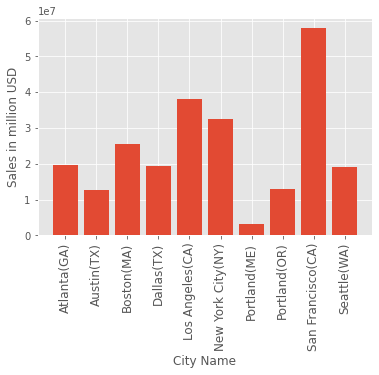

In [28]:
plt.bar(cities,sales['total_sales'])
plt.xticks(cities,rotation='vertical',size=12)
plt.xlabel('City Name')
plt.ylabel('Sales in million USD')
plt.show()

### San Francisco,California have highest sales 

# What time should we display advertisements to maximize the likelihood of purchases?

In [29]:
# Converting column to date time format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [30]:
all_data['hours'] = all_data['Order Date'].dt.hour

no_of_sales = all_data.groupby(['hours']).agg({'Order ID':'count'})
no_of_sales

,Order ID
hours,
0,27370
1,16450
2,8701
3,5817
4,5978
5,9247
6,17374
7,28077
8,43792


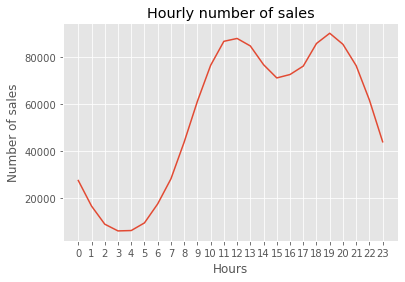

In [31]:
hours = [hour for hour,data in all_data.groupby(['hours'])]
# Method2: hours = range(0,24)

# line graph
plt.plot(hours,no_of_sales['Order ID'])
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of sales')
plt.title('Hourly number of sales')
plt.show()

### Sellers should advertise their product between or just before 11am to 1pm and 6pm to 8pm to increase their sales

# What time should we display advertisements to increase sales in Portland,ME 

In [32]:
citywise_data = all_data.groupby(['city','hours']).agg({'Order ID':'count'})
citywise_data

Order ID
city        hours          
Atlanta(GA) 0          2170
            1          1491
            2           791
            3           399
            4           560
...                     ...
Seattle(WA) 19         6923
            20         6916
            21         6083
            22         4851
            23         3857

[240 rows x 1 columns]

## Hourly sales in Portland,ME

In [33]:
hourly_sales = citywise_data.iloc[citywise_data.index.get_level_values('city') == 'Portland(ME)']
# Another method: y = check.iloc[check.index.get_level_values(grouped_data_name='city' or grouped_data_level=0) == ' Atlanta (GA)']

hourly_sales

Order ID
city         hours          
Portland(ME) 0           336
             1           238
             2            98
             3            77
             4            77
             5            98
             6           280
             7           392
             8           581
             9           742
             10         1106
             11         1239
             12         1127
             13         1043
             14         1001
             15          987
             16          966
             17         1071
             18         1141
             19         1232
             20         1092
             21          966
             22          847
             23          448

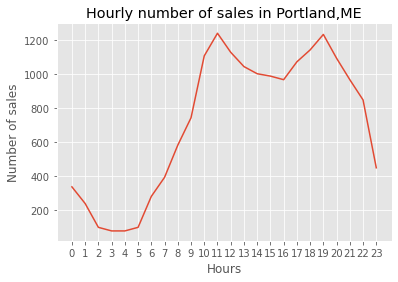

In [34]:
hours = [hour for hour,data in all_data.groupby(['hours'])]
plt.xlabel('Hours')
plt.xticks(hours)
plt.ylabel('Number of sales')
plt.title('Hourly number of sales in Portland,ME')
plt.plot(hours,hourly_sales.values)
plt.show()

# What products are most often sold together?

In [35]:
multi_prod = all_data[all_data.duplicated(subset='Order ID',keep = False)]
print("Order ID's with multiple products:\n",multi_prod['Order ID'])

Order ID's with multiple products:
 0        176558
1        176559
2        176560
3        176560
4        176561
          ...  
11681    259353
11682    259354
11683    259355
11684    259356
11685    259357
Name: Order ID, Length: 1301650, dtype: int32


In [36]:
multi_prod[multi_prod['Order ID'] == 176560]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sales,city,hours
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14
30395,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14
30396,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14
60788,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14
60789,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14
91181,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14
91182,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14


In [37]:
multi_prod['m_order'] = multi_prod.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))

In [38]:
multi_prod.drop_duplicates(subset='Order ID',keep='last',inplace=True)

In [39]:
multi_prod[multi_prod['Order ID'] == 176560]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sales,city,hours,m_order
151968,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,"Google Phone,Wired Headphones,Google Phone,Wir..."


In [40]:
from itertools import combinations
from collections import Counter

sublist_to_count = list()
holding_values = dict()

count = Counter()

for prod in multi_prod['m_order']:
    sublist_to_count = prod.split(',')
    count.update(combinations(sublist_to_count, 2))

for key,val in count.most_common(10):
    print(key,':',val)


('USB-C Charging Cable', 'USB-C Charging Cable') : 462315
('Lightning Charging Cable', 'Lightning Charging Cable') : 457464
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') : 435813
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') : 433832
('Wired Headphones', 'Wired Headphones') : 398237
('Apple Airpods Headphones', 'Apple Airpods Headphones') : 327705
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') : 281148
('27in FHD Monitor', '27in FHD Monitor') : 158088
('iPhone', 'iPhone') : 143780
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') : 131075


### When a customer is buying a phone it is most likely that they will buy a charging cable and headphone with it.

# Which product has maximum sales?

In [41]:
product_list = all_data.groupby('Product')
products = [i for i,j in product_list]

total_quantity = all_data.groupby('Product').sum()['Quantity Ordered']

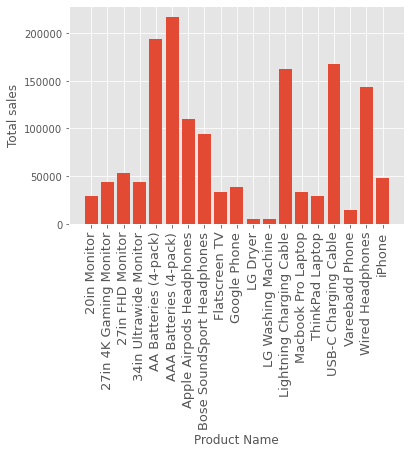

In [42]:
plt.bar(products,total_quantity)
plt.xticks(products,rotation='vertical',size=13)
plt.xlabel('Product Name')
plt.ylabel('Total sales')
plt.show()

### AAA Batteries (4-pack) have maximum sales because it's cheaper

# 12 Months Profile Report

In [43]:
profile = ProfileReport(all_data, title="Pandas Profiling Report")

In [44]:
profile.to_widgets()